 # Classification Airline Passenger Satisfaction info

## Import libraries
_____________________________

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.set_printoptions(suppress=True)


## Load Data
____________

In [187]:
df = pd.read_csv('train.csv', index_col=[0]) #read the data 

df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [188]:
df.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [189]:
df.sample (10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
42610,101107,Male,Loyal Customer,41,Business travel,Business,1235,3,3,3,...,5,5,5,5,5,5,3,0,0.0,satisfied
39649,50930,Male,Loyal Customer,60,Personal Travel,Eco,110,4,4,4,...,5,1,2,4,1,4,5,54,53.0,neutral or dissatisfied
33436,25446,Female,Loyal Customer,26,Personal Travel,Eco,669,2,3,2,...,5,2,1,3,3,3,5,0,0.0,neutral or dissatisfied
42553,117812,Male,Loyal Customer,41,Business travel,Business,328,2,2,2,...,4,4,4,4,2,4,1,6,2.0,satisfied
103630,35080,Female,Loyal Customer,43,Business travel,Eco,944,5,2,2,...,5,5,5,5,1,5,1,14,0.0,satisfied
84995,83228,Male,Loyal Customer,57,Business travel,Business,1979,3,3,3,...,4,4,4,4,4,4,3,0,0.0,satisfied
100432,121688,Male,Loyal Customer,63,Personal Travel,Eco,328,4,4,4,...,1,1,4,4,5,1,1,0,0.0,satisfied
11754,128956,Female,Loyal Customer,52,Business travel,Eco,414,2,4,4,...,2,2,2,2,3,2,1,95,106.0,neutral or dissatisfied
86263,116075,Male,Loyal Customer,31,Personal Travel,Eco,373,2,3,2,...,1,1,1,4,3,4,1,11,11.0,neutral or dissatisfied
37904,64250,Female,Loyal Customer,52,Personal Travel,Eco,1660,4,4,4,...,5,5,4,5,3,5,5,0,15.0,neutral or dissatisfied


In [190]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [191]:
df.shape 

(103904, 24)

In [192]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [193]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

chiking for target(Y)
_________

In [194]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [195]:
df['satisfaction'].nunique()

2

In [196]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

# Split the Data
______________


Spilt the data into Train 80% and Test 20%
_____

In [197]:
seed=30

In [198]:
df_train, df_test = train_test_split(df ,test_size=0.2,random_state=seed )

 Train Data EDA

In [199]:
df_train

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
99599,48630,Female,Loyal Customer,45,Business travel,Business,1939,0,4,0,...,4,4,2,2,4,4,4,0,0.0,satisfied
13539,122468,Male,Loyal Customer,52,Business travel,Business,2205,4,4,4,...,4,4,4,4,3,4,1,14,8.0,neutral or dissatisfied
51615,63750,Male,Loyal Customer,44,Personal Travel,Eco,1660,2,2,2,...,2,4,5,4,1,3,2,0,0.0,neutral or dissatisfied
56520,1277,Male,Loyal Customer,52,Personal Travel,Eco,89,3,4,3,...,1,1,2,3,1,5,1,16,13.0,neutral or dissatisfied
7010,120091,Male,Loyal Customer,29,Business travel,Business,683,5,5,5,...,4,5,3,5,5,5,4,0,4.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46220,4885,Female,Loyal Customer,11,Personal Travel,Eco,500,0,5,0,...,5,5,2,4,3,5,5,0,0.0,satisfied
98804,98824,Male,disloyal Customer,25,Business travel,Eco,763,3,3,3,...,4,1,1,3,2,3,4,78,99.0,neutral or dissatisfied
48045,26791,Male,disloyal Customer,36,Business travel,Business,226,4,4,4,...,1,3,4,4,3,4,1,0,0.0,neutral or dissatisfied
70053,8890,Male,Loyal Customer,15,Personal Travel,Eco,539,1,5,1,...,2,4,5,4,4,4,2,21,14.0,neutral or dissatisfied


In [200]:
df_train.sample (10)

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
32270,40187,Male,Loyal Customer,37,Business travel,Business,531,5,5,5,...,5,5,5,5,5,5,3,0,0.0,satisfied
37985,119805,Male,disloyal Customer,39,Business travel,Business,936,2,2,2,...,2,4,3,5,3,4,2,17,7.0,satisfied
1053,67623,Female,Loyal Customer,46,Business travel,Business,1235,5,5,5,...,3,3,3,3,5,3,4,0,0.0,satisfied
31990,114817,Male,Loyal Customer,41,Business travel,Business,372,5,5,4,...,4,4,5,4,4,4,5,25,19.0,satisfied
78515,95929,Female,Loyal Customer,71,Business travel,Eco,1011,2,2,2,...,2,2,2,2,5,2,2,0,0.0,satisfied
38200,59275,Female,Loyal Customer,48,Business travel,Business,1802,2,2,2,...,4,5,5,4,5,4,5,0,0.0,satisfied
28385,100686,Male,Loyal Customer,25,Business travel,Business,1786,1,1,2,...,4,4,2,4,2,1,4,31,30.0,satisfied
83638,108263,Male,disloyal Customer,57,Business travel,Eco,495,2,2,2,...,2,1,1,4,2,4,2,0,0.0,neutral or dissatisfied
101371,60094,Female,disloyal Customer,29,Business travel,Business,1012,4,4,4,...,2,4,5,5,5,4,2,0,4.0,satisfied
55627,103843,Male,disloyal Customer,46,Business travel,Business,1072,3,3,3,...,3,3,3,4,1,4,3,10,0.0,neutral or dissatisfied


In [201]:
df_train.shape 

(83123, 24)

In [202]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83123 entries, 99599 to 38693
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer_Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type_of_Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight_Distance                    83123 non-null  int64  
 7   Inflight_wifi_service              83123 non-null  int64  
 8   Departure/Arrival_time_convenient  83123 non-null  int64  
 9   Ease_of_Online_booking             83123 non-null  int64  
 10  Gate_location                      83123 non-null  int64  
 11  Food_and_drink                     83123 non-null 

# Handel the train data 
_______

In [203]:
df_train.isnull().sum()

id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             245
satisfaction                           0
dtype: int64

fill with median or mean depend on data distripution

In [204]:
df_train['Arrival_Delay_in_Minutes'].median()

0.0

In [269]:
df_train['Arrival_Delay_in_Minutes'].describe()


count    83123.000000
mean        15.143342
std         38.891336
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1584.000000
Name: Arrival_Delay_in_Minutes, dtype: float64

In [205]:
df_train['Arrival_Delay_in_Minutes'] = df_train['Arrival_Delay_in_Minutes'].fillna(df_train['Arrival_Delay_in_Minutes'].median())

In [206]:
df_train.duplicated().sum() 

0

In [207]:
numerical_features = df_train.select_dtypes(exclude=['object']).copy()
numerical_features.columns

Index(['id', 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'],
      dtype='object')

In [263]:
print(list(range(len(numerical_features.columns))))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


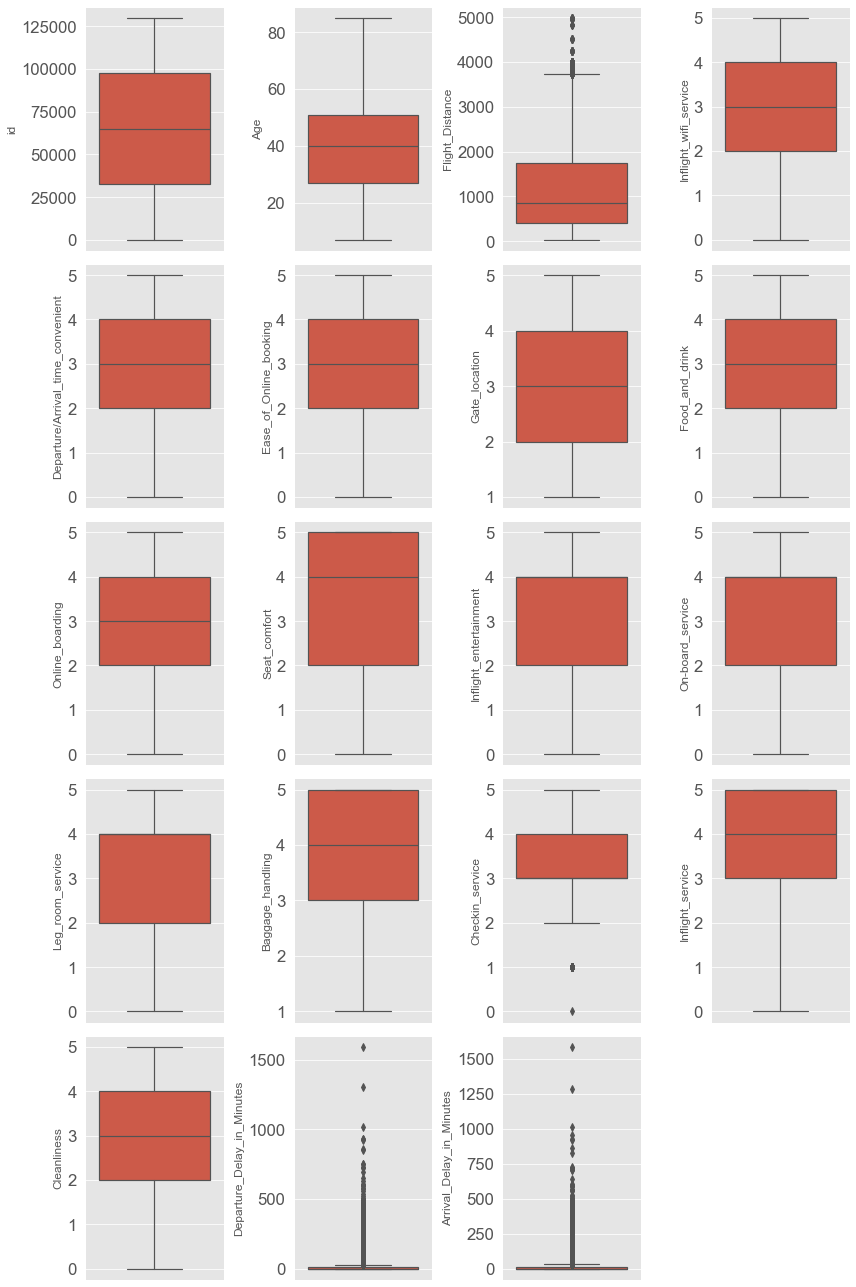

In [208]:

fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(5,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

## Visualization of the data
_________

In [209]:
df_train.describe()

,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000
mean,64861.793812,39.413640,1190.164082,2.728511,3.057108,2.755206,2.974628,3.206345,3.253335,3.443151,3.365482,3.388172,3.354884,3.632232,3.306810,3.642927,3.290281,14.807574,15.143342
std,37474.467712,15.092303,998.396339,1.327192,1.525147,1.398030,1.277405,1.329621,1.348535,1.317575,1.331953,1.286404,1.314733,1.180796,1.265402,1.174510,1.311887,38.450820,38.891336
min,2.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32424.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64715.000000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97332.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [210]:
df_train.corr()

,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
id,1.000000,0.023967,0.097215,-0.019456,-0.003361,0.014280,-0.000335,0.002173,0.057341,0.051768,0.003100,0.054544,0.044300,0.076561,0.079185,0.079824,0.025973,-0.018339,-0.035572
Age,0.023967,1.000000,0.099048,0.018496,0.038492,0.025711,0.001231,0.022824,0.209464,0.159845,0.076895,0.059456,0.041611,-0.046050,0.037247,-0.048431,0.051988,-0.009967,-0.011617
Flight_Distance,0.097215,0.099048,1.000000,0.004634,-0.019952,0.065333,0.003869,0.056299,0.217012,0.157529,0.128752,0.110821,0.135994,0.063171,0.074079,0.059516,0.093071,0.003973,-0.000186
Inflight_wifi_service,-0.019456,0.018496,0.004634,1.000000,0.344267,0.716543,0.336494,0.133401,0.456090,0.121088,0.207043,0.120896,0.160354,0.119385,0.043653,0.110487,0.131067,-0.017364,-0.018732
Departure/Arrival_time_convenient,-0.003361,0.038492,-0.019952,0.344267,1.000000,0.436776,0.445505,0.005390,0.068031,0.011455,-0.006082,0.067122,0.013310,0.072367,0.093633,0.072332,0.014299,0.004656,0.002771
Ease_of_Online_booking,0.014280,0.025711,0.065333,0.716543,0.436776,1.000000,0.457714,0.030501,0.402273,0.027779,0.045469,0.038555,0.107364,0.037959,0.011901,0.035669,0.014848,-0.002988,-0.004867
Gate_location,-0.000335,0.001231,0.003869,0.336494,0.445505,0.457714,1.000000,-0.001104,0.000505,0.002149,0.003520,-0.028130,-0.006523,0.002954,-0.033707,0.001138,-0.004141,0.006256,0.006319
Food_and_drink,0.002173,0.022824,0.056299,0.133401,0.005390,0.030501,-0.001104,1.000000,0.232874,0.573763,0.621413,0.058949,0.035512,0.034390,0.086838,0.033685,0.656560,-0.029091,-0.032129
Online_boarding,0.057341,0.209464,0.217012,0.456090,0.068031,0.402273,0.000505,0.232874,1.000000,0.419174,0.284012,0.156716,0.126095,0.083254,0.205962,0.076429,0.329270,-0.018451,-0.021520
Seat_comfort,0.051768,0.159845,0.157529,0.121088,0.011455,0.027779,0.002149,0.573763,0.419174,1.000000,0.609599,0.131058,0.107630,0.075681,0.193182,0.069735,0.678405,-0.027534,-0.029364


<AxesSubplot:>

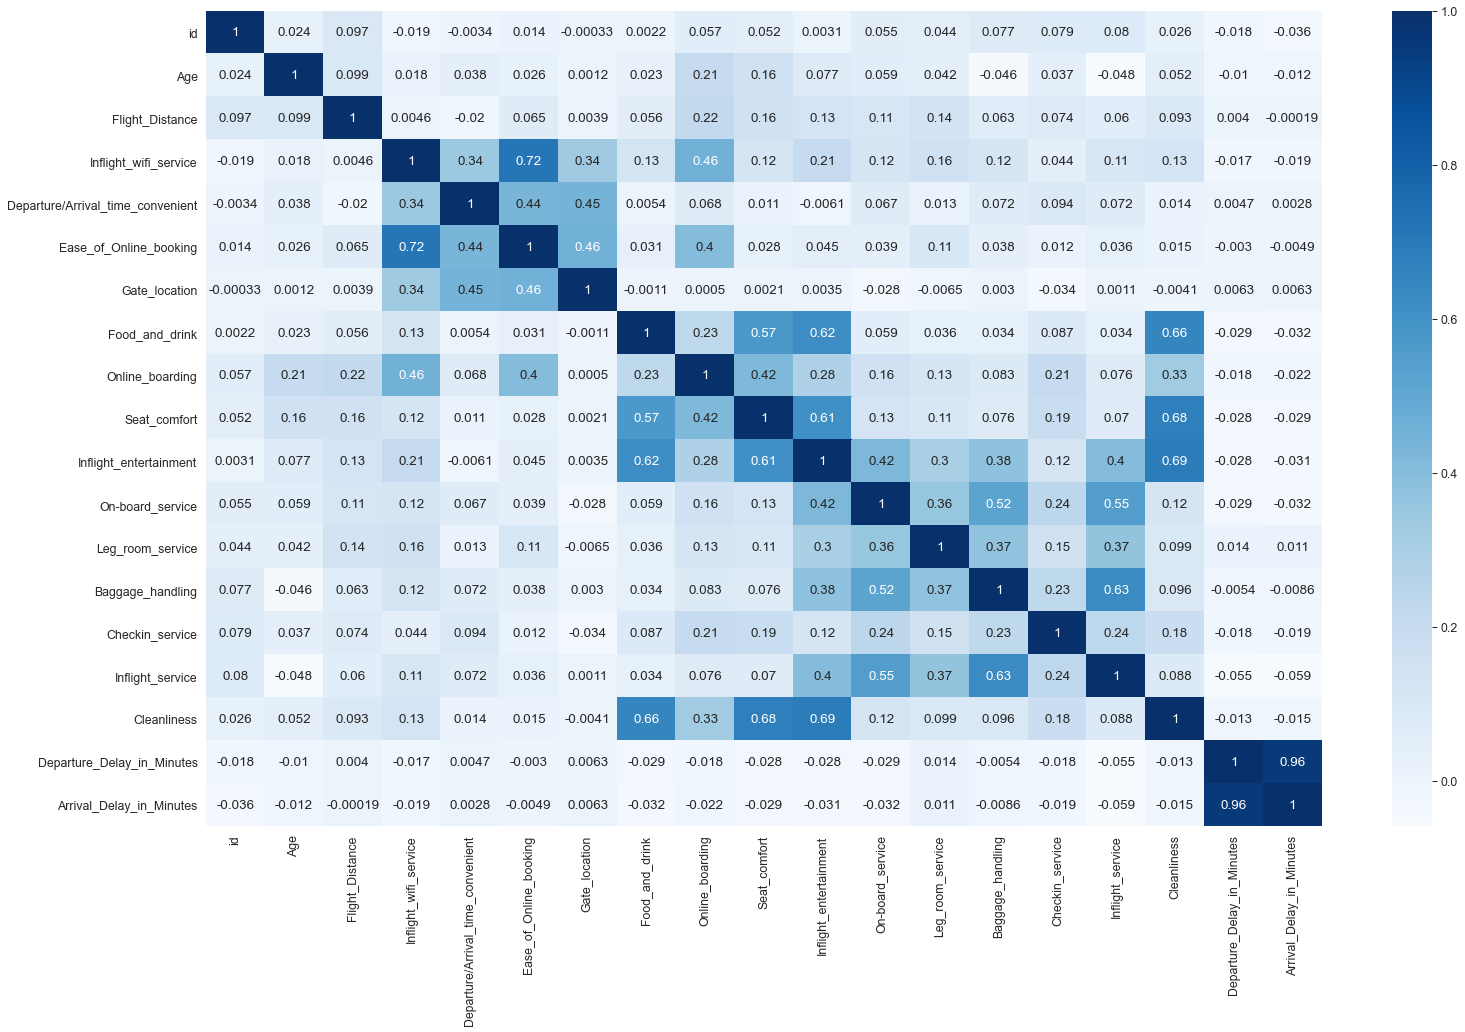

In [211]:
sns.set_style('whitegrid')
plt.figure(figsize=(25,15))
sns.set_context('paper', font_scale=1.4)

crash_mx = df_train.corr()
sns.heatmap(crash_mx, annot=True, cmap='Blues')

•	"Ease of Online booking" and "Inflight wifi service" are positive correlated with ratio 0.72

•	"Inflight entertainment" and "Food and drink" are positive correlated with ratio 0.62.

•	"Inflight entertainment" and "Seat comfort" are positive correlated with ratio 0.61.

•	"Inflight service" and "Baggage handling" are positive correlated with ratio 0.63.

•	"Cleanliness" and "Food and drink" are positive correlated with ratio 0.66.

•	"Cleanliness" and "Seat comfort" are positive correlated with ratio 0.68.

•	"Cleanliness" and "Inflight entertainment" are positive correlated with ratio 0.69.

•	Arrival Delay in Minutes & Departure Delay in Minutes =96


'Departure delay in minutes' and 'Arrival delay in minutes' columns are highly positive correlated (0.96) as we have seen. Normally we should drop one of them. Since 'Arrival_Delay_in_Minutes' column has null values, it would be our first choice. But 'Departure delay in minutes' and 'Arrival_Delay_in_Minutes' columns have full of zero values, so they are not very important features in model. I will drop both of these columns.

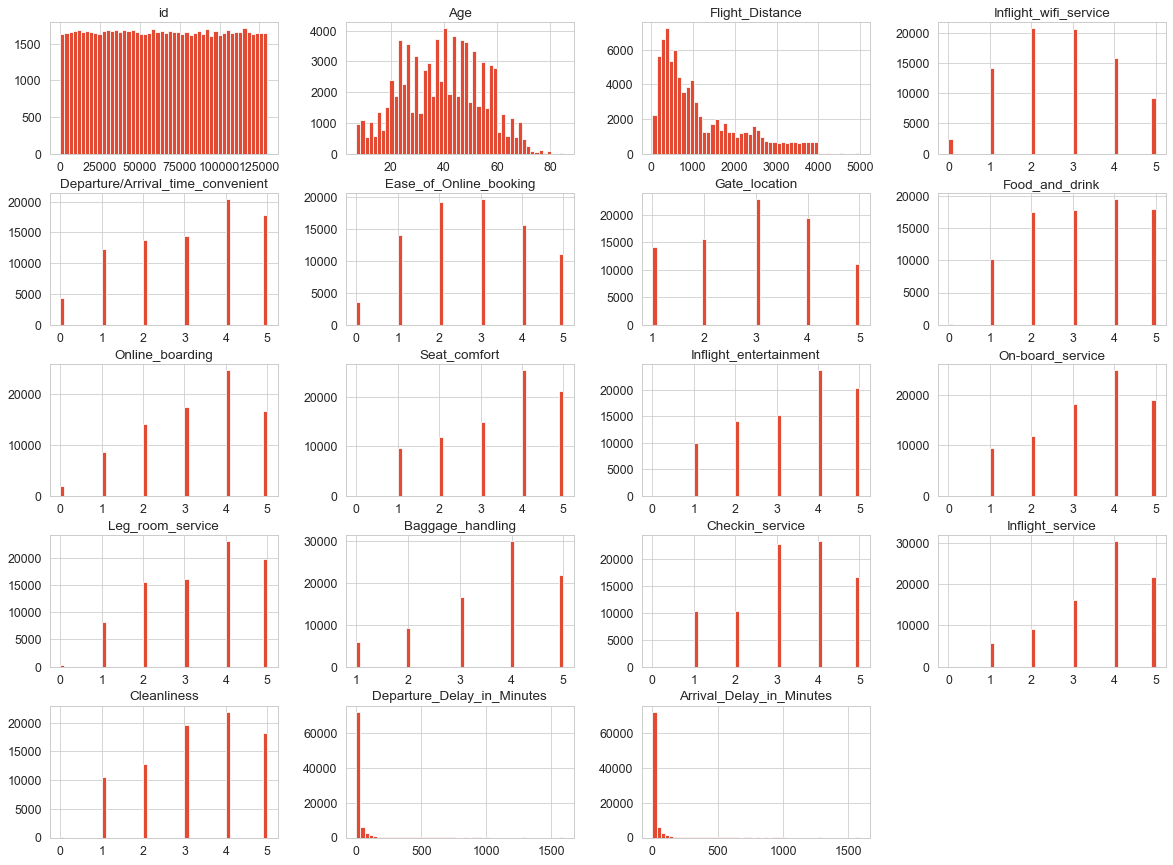

In [212]:
df_train.hist(bins=50, figsize=(20,15));

In [213]:
def bar_plot(variable):
    
    var=df_train[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

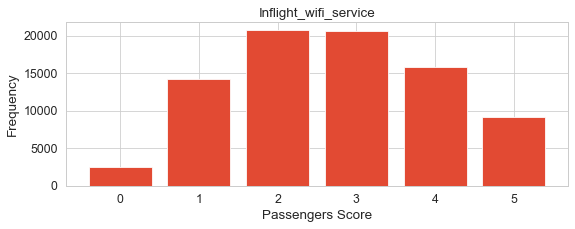

Inflight_wifi_service: 
 2    20751
3    20675
4    15821
1    14231
5     9152
0     2493
Name: Inflight_wifi_service, dtype: int64


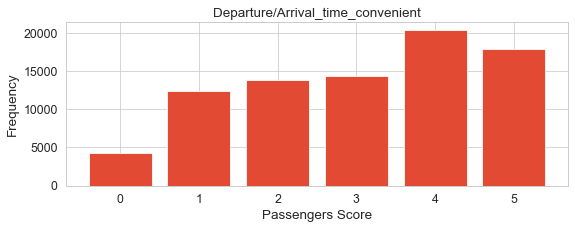

Departure/Arrival_time_convenient: 
 4    20399
5    17863
3    14407
2    13801
1    12382
0     4271
Name: Departure/Arrival_time_convenient, dtype: int64


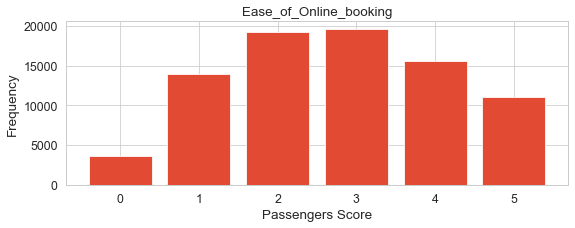

Ease_of_Online_booking: 
 3    19621
2    19267
4    15560
1    14019
5    11073
0     3583
Name: Ease_of_Online_booking, dtype: int64


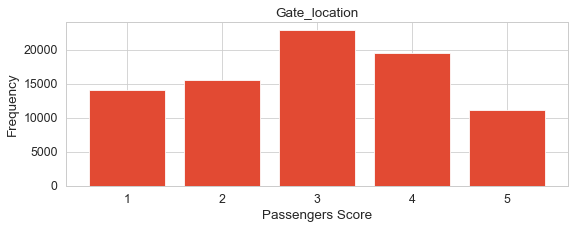

Gate_location: 
 3    22869
4    19507
2    15602
1    14076
5    11069
Name: Gate_location, dtype: int64


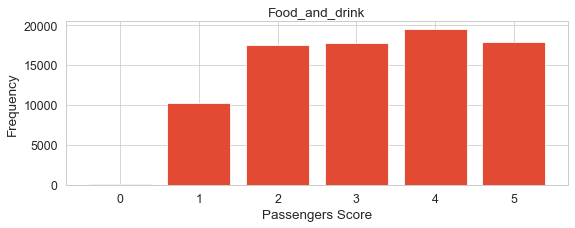

Food_and_drink: 
 4    19521
5    17939
3    17813
2    17539
1    10225
0       86
Name: Food_and_drink, dtype: int64


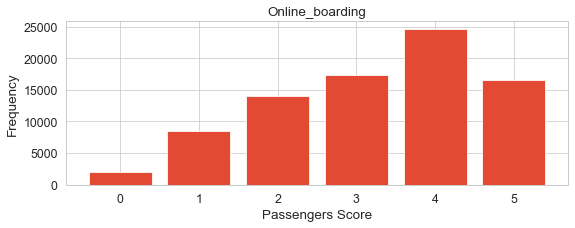

Online_boarding: 
 4    24632
3    17400
5    16624
2    14030
1     8519
0     1918
Name: Online_boarding, dtype: int64


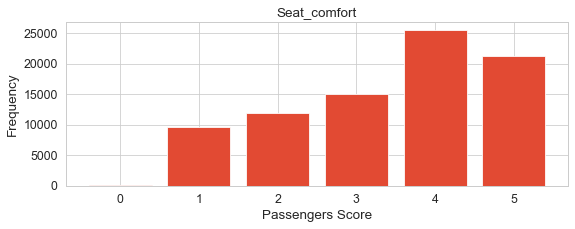

Seat_comfort: 
 4    25508
5    21203
3    14946
2    11855
1     9610
0        1
Name: Seat_comfort, dtype: int64


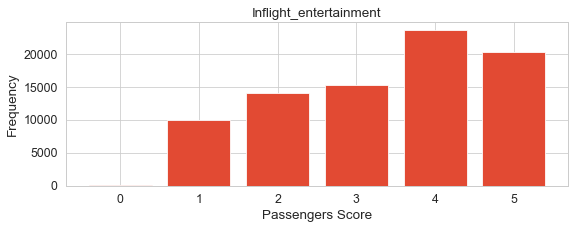

Inflight_entertainment: 
 4    23635
5    20306
3    15228
2    14050
1     9895
0        9
Name: Inflight_entertainment, dtype: int64


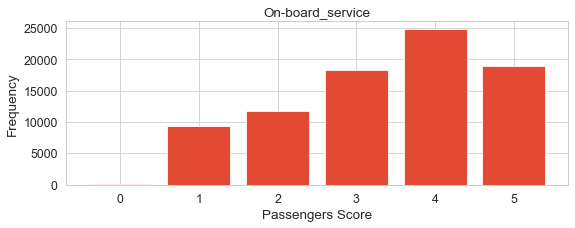

On-board_service: 
 4    24797
5    18994
3    18204
2    11739
1     9387
0        2
Name: On-board_service, dtype: int64


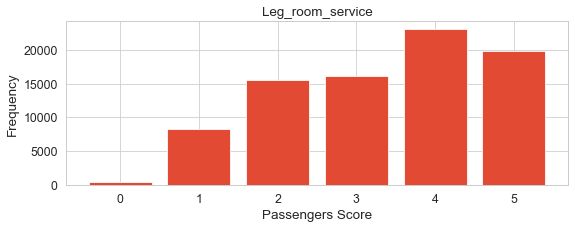

Leg_room_service: 
 4    23067
5    19802
3    16059
2    15591
1     8231
0      373
Name: Leg_room_service, dtype: int64


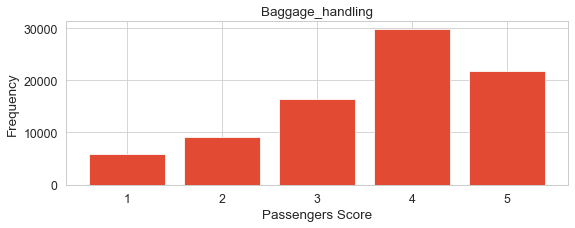

Baggage_handling: 
 4    29867
5    21731
3    16526
2     9222
1     5777
Name: Baggage_handling, dtype: int64


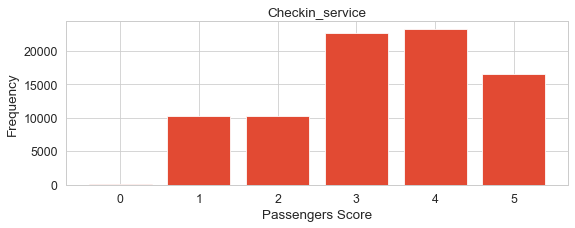

Checkin_service: 
 4    23254
3    22752
5    16554
1    10294
2    10268
0        1
Name: Checkin_service, dtype: int64


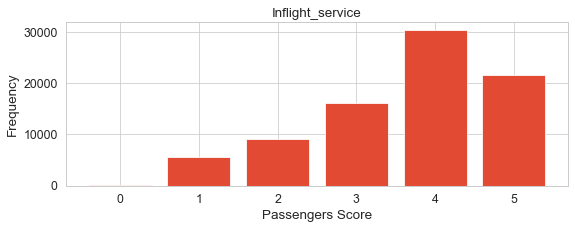

Inflight_service: 
 4    30409
5    21731
3    16183
2     9173
1     5625
0        2
Name: Inflight_service, dtype: int64


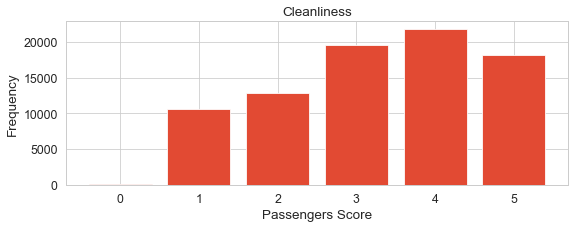

Cleanliness: 
 4    21830
3    19601
5    18208
2    12859
1    10617
0        8
Name: Cleanliness, dtype: int64


In [214]:
category1=["Inflight_wifi_service", "Departure/Arrival_time_convenient", "Ease_of_Online_booking", "Gate_location", "Food_and_drink", "Online_boarding", "Seat_comfort", "Inflight_entertainment", "On-board_service", "Leg_room_service", "Baggage_handling", "Checkin_service", "Inflight_service", "Cleanliness"]
for c in category1:
    bar_plot(c)


In [215]:
df_train['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.564765
satisfied                  0.435235
Name: satisfaction, dtype: float64

Text(0.5, 1.0, 'Neutral or Dissatisfied vs Statisfied')

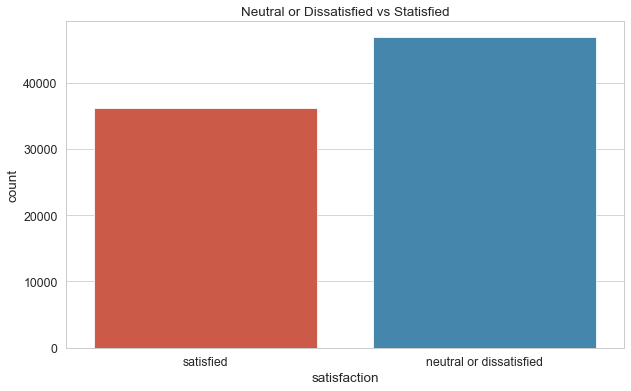

In [216]:
plt.figure(figsize=(10,6))
sns.countplot(x='satisfaction', data = df_train).set_title('Neutral or Dissatisfied vs Statisfied')

Text(0.5, 1.0, 'Histogram of Flight Distance')

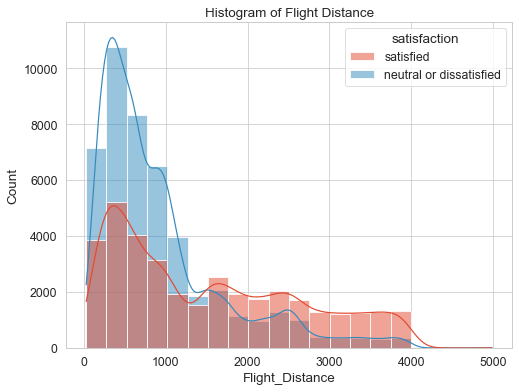

In [217]:
plt.figure(figsize=(8,6))
sns.histplot(x='Flight_Distance', data = df_train, bins = 20, hue ='satisfaction', 
             kde = True).set_title('Histogram of Flight Distance')

Text(0.5, 1.0, 'Histogram of Flight Distance by Eco and Eco Plus Class')

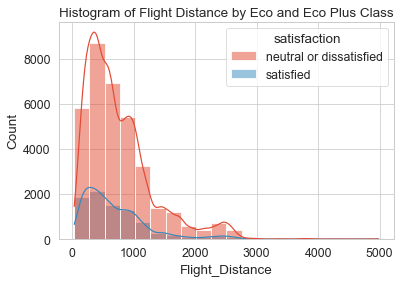

In [218]:
sns.histplot(x='Flight_Distance', data =  df_train[ df_train['Class'] != 'Business'],
bins = 20, hue ='satisfaction',
kde = True).set_title('Histogram of Flight Distance by Eco and Eco Plus Class')

Text(0.5, 1.0, 'Histogram of Flight Distance by Business Class')

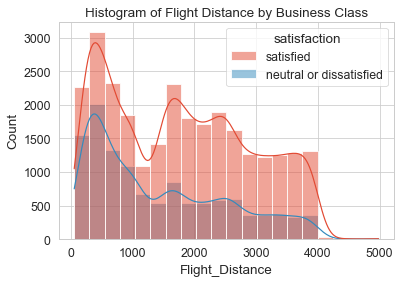

In [219]:
sns.histplot(x='Flight_Distance', data =  df_train[ df_train['Class'] == 'Business'],bins = 20, hue ='satisfaction', 
             kde = True).set_title('Histogram of Flight Distance by Business Class')

Text(0.5, 1.0, 'Histogram of Departure Delay')

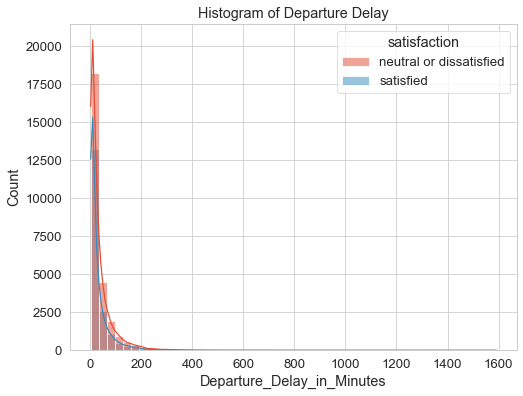

In [262]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

sns.histplot(x='Departure_Delay_in_Minutes', data = df[df['Departure_Delay_in_Minutes'] >0], 
             bins = 50, hue ='satisfaction', kde = True).set_title('Histogram of Departure Delay')

In [220]:
#plt.figure(figsize=(8,6))
#sns.histplot(x='Arrival_Delay_in_Minutes', data = df_train, bins = 20, hue ='satisfaction', 
             #kde = True).set_title('Histogram of Flight Distance')

<AxesSubplot:title={'center':'Customer Satisfaction \nby Flight with delayed departure \nand on-time arrival'}, xlabel='satisfaction', ylabel='count'>

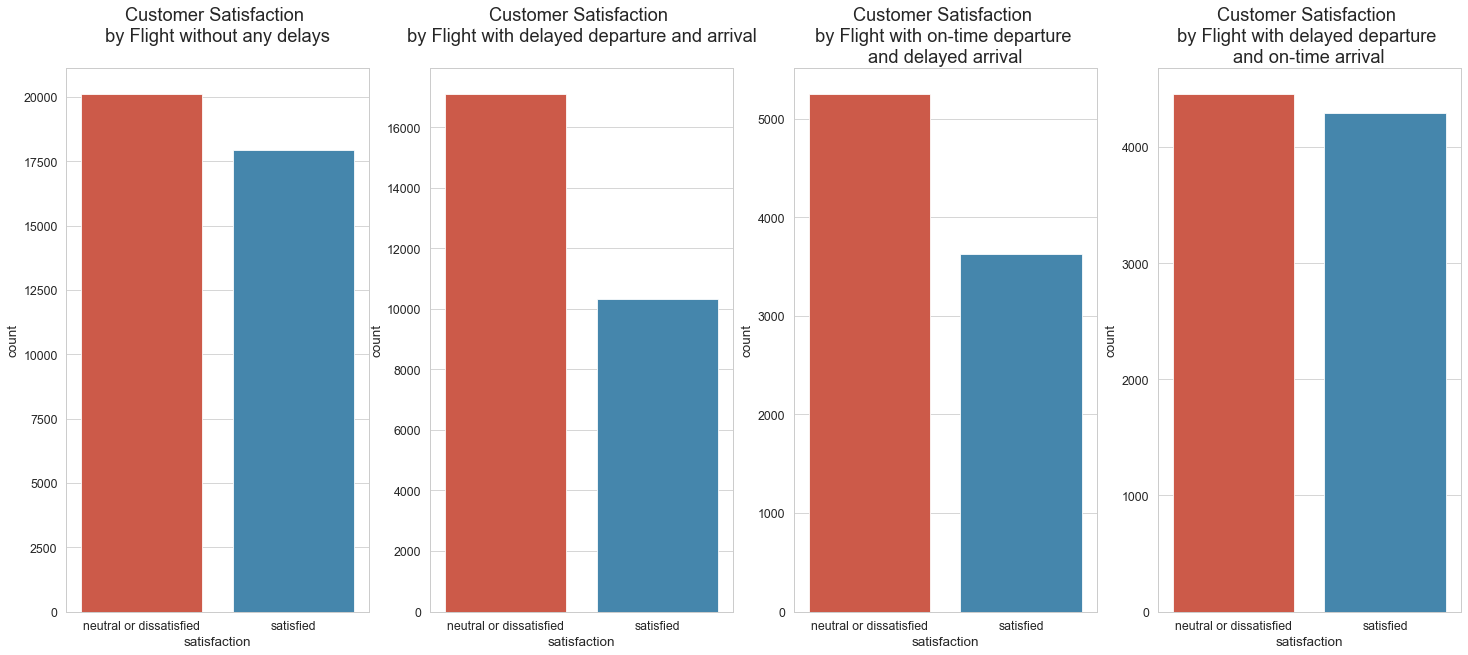

In [221]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,4, figsize=(25,10))
sns.set_context('paper', font_scale=1.9)


ax[0].set_title('Customer Satisfaction \nby Flight without any delays\n')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data =  df_train[( df_train['Departure_Delay_in_Minutes']==0) & ( df_train['Arrival_Delay_in_Minutes']==0 )], 
              ax=ax[0])

ax[1].set_title('Customer Satisfaction \nby Flight with delayed departure and arrival\n')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data =  df_train[( df_train['Departure_Delay_in_Minutes'] > 0) & ( df_train['Arrival_Delay_in_Minutes'] > 0)], 
              ax=ax[1])

ax[2].set_title('Customer Satisfaction \nby Flight with on-time departure \nand delayed arrival')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data =  df_train[( df_train['Departure_Delay_in_Minutes'] == 0) & ( df_train['Arrival_Delay_in_Minutes'] > 0)], 
              ax=ax[2])

ax[3].set_title('Customer Satisfaction \nby Flight with delayed departure \nand on-time arrival')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data =  df_train[( df_train['Departure_Delay_in_Minutes'] > 0) & ( df_train['Arrival_Delay_in_Minutes'] == 0)], 
              ax=ax[3])

[Text(0.5, 1.0, 'Online boarding rates')]

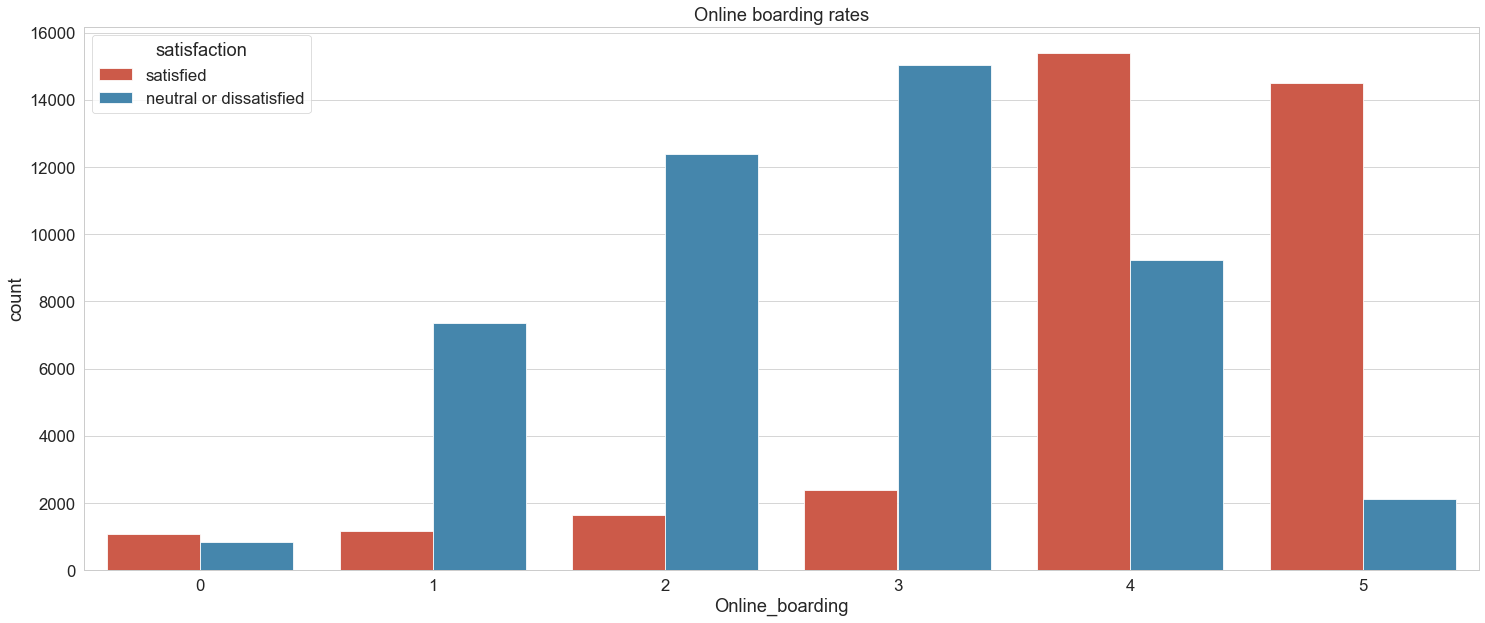

In [222]:
plt.figure(figsize=(25,10))
sns.countplot(x='Online_boarding',hue="satisfaction", 
              data=df_train).set(title='Online boarding rates')
    

[Text(0.5, 1.0, 'satisfaction with costumer types')]

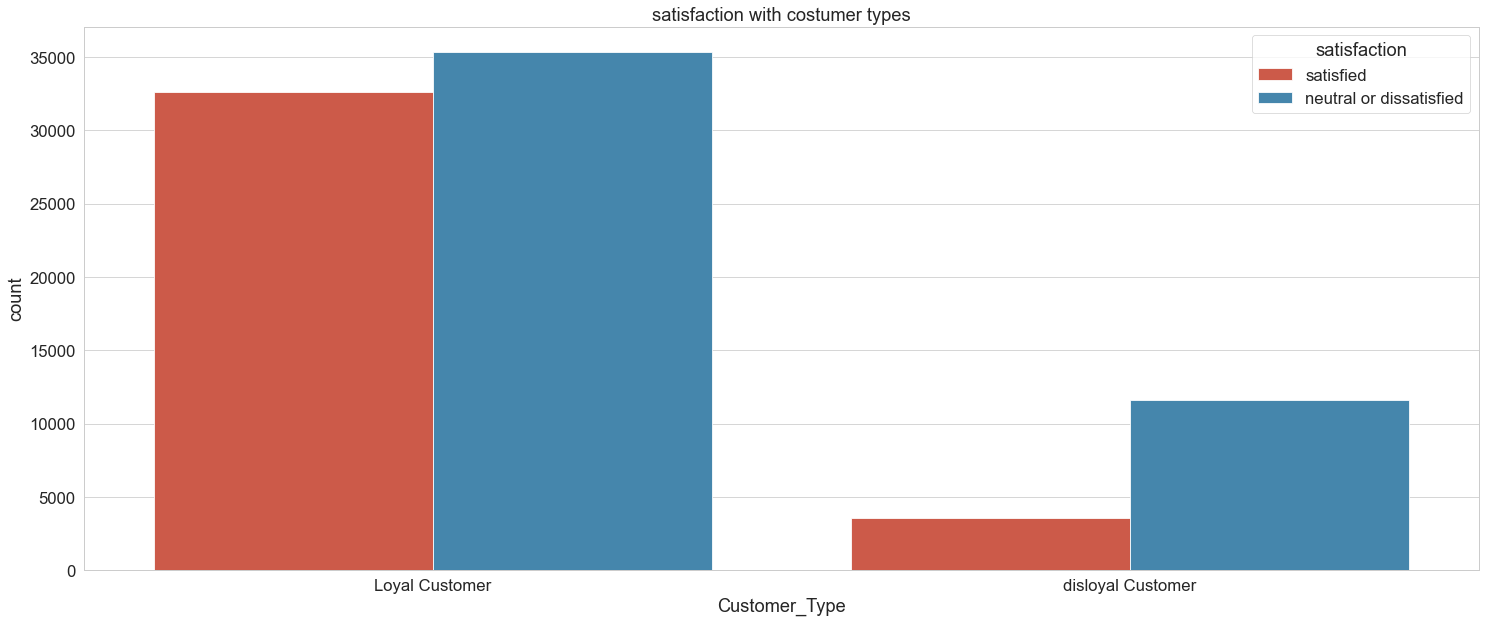

In [223]:
plt.figure(figsize=(25,10))
sns.countplot(x='Customer_Type',hue="satisfaction",data=df_train).set(title='satisfaction with costumer types')

<AxesSubplot:title={'center':'Customer Satisfaction by Type of Travel'}, xlabel='satisfaction', ylabel='count'>

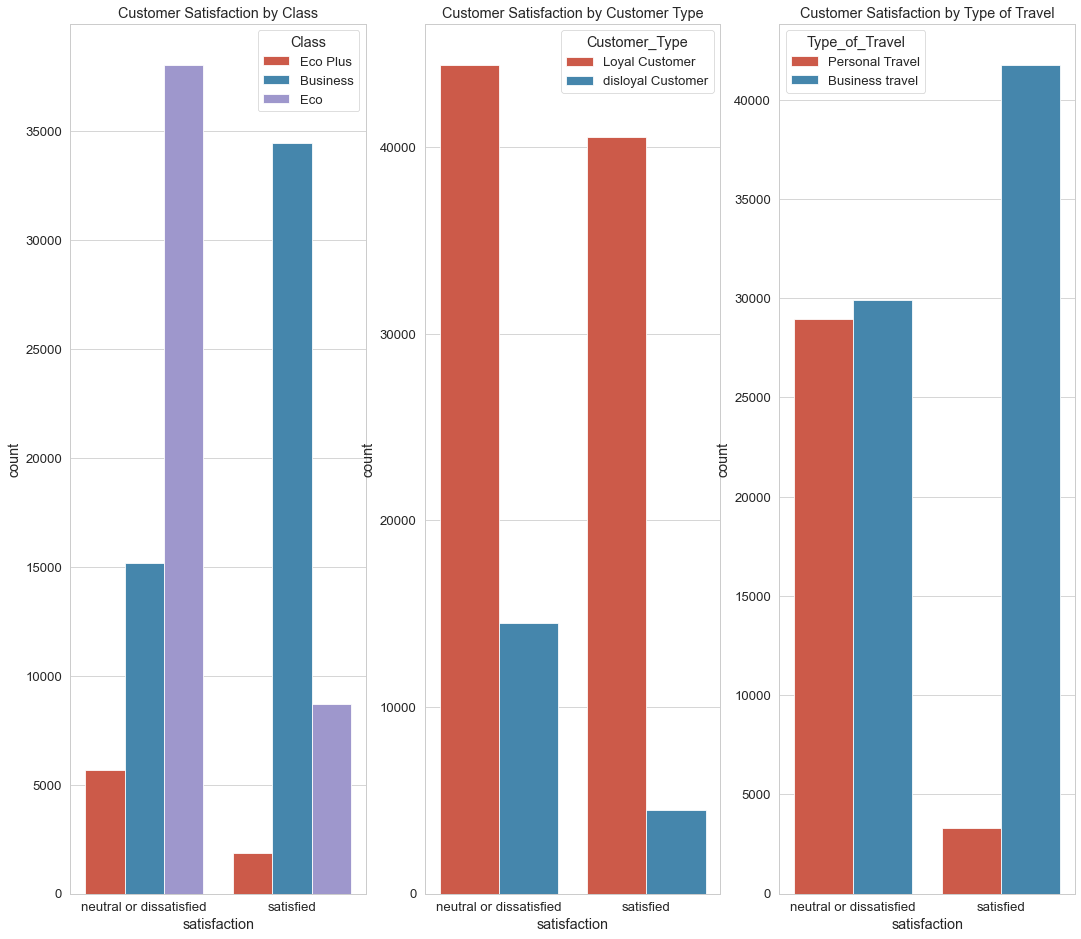

In [259]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,3, figsize=(18,16))
sns.set_context('paper', font_scale=1.5)

ax[0].set_title('Customer Satisfaction by Class')
sns.countplot(x='satisfaction', data = df, hue = 'Class', ax=ax[0])

ax[1].set_title('Customer Satisfaction by Customer Type')
sns.countplot(x='satisfaction', data = df, hue = 'Customer_Type', ax=ax[1])

ax[2].set_title('Customer Satisfaction by Type of Travel')
sns.countplot(x='satisfaction', data = df, hue = 'Type_of_Travel', ax=ax[2])

[Text(0.5, 1.0, 'food and drink rates')]

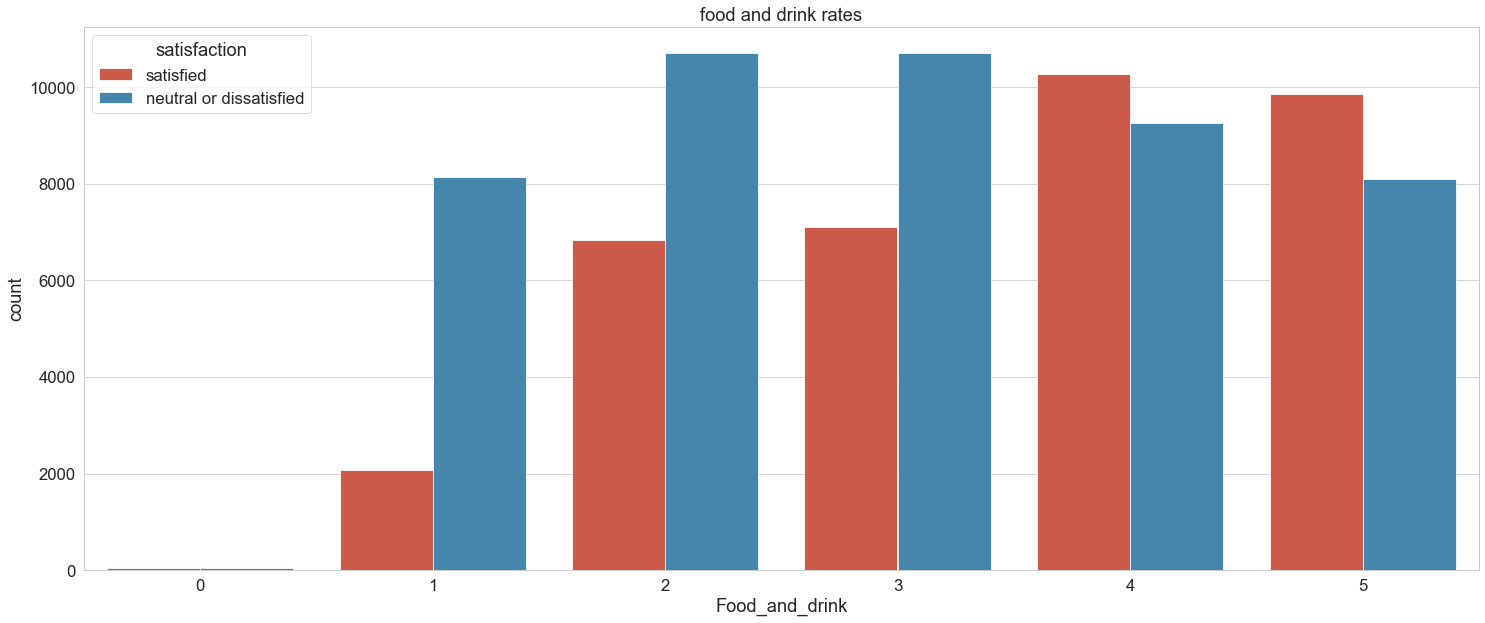

In [224]:
plt.figure(figsize=(25,10))
sns.countplot(x='Food_and_drink',hue="satisfaction",
              data=df_train).set(title='food and drink rates')

In [225]:
df_train.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

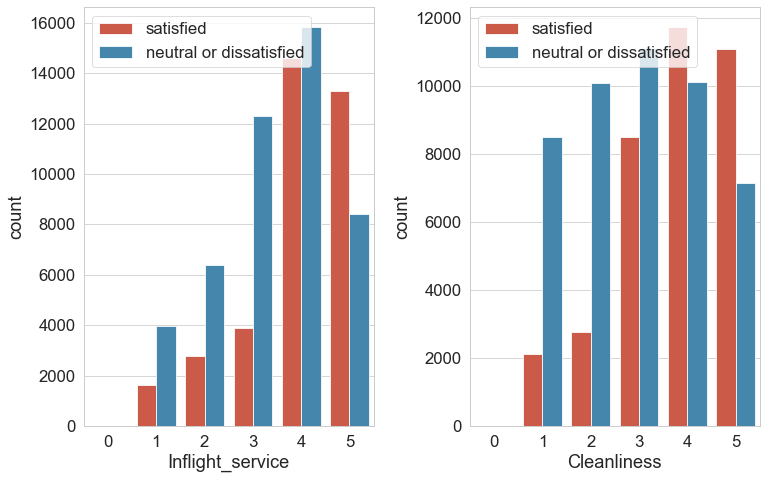

In [226]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
sns.countplot('Inflight_service',data=df_train,hue='satisfaction')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
sns.countplot('Cleanliness',data=df_train,hue='satisfaction')
plt.legend(loc='upper left')
plt.tight_layout()

[Text(0.5, 1.0, 'Gender')]

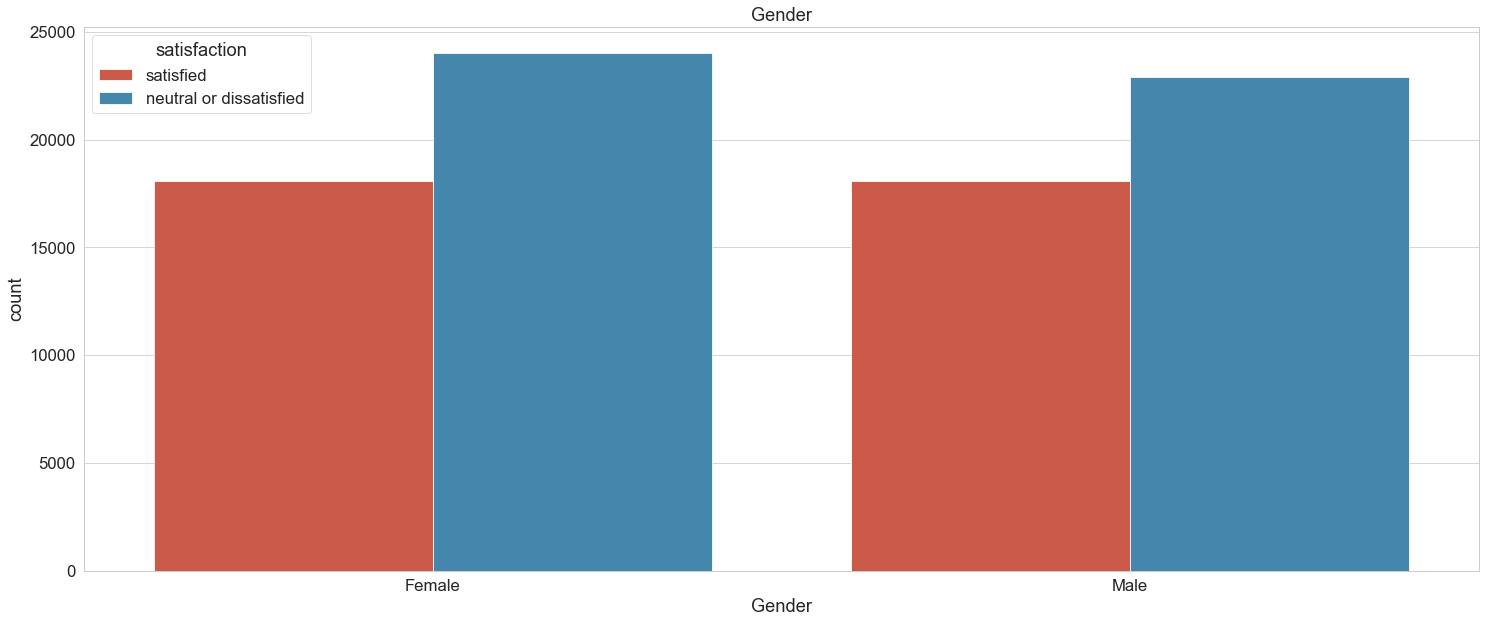

In [227]:
plt.figure(figsize=(25,10))
sns.countplot(x='Gender',hue="satisfaction", data=df_train).set(title='Gender')

<Figure size 864x432 with 0 Axes>

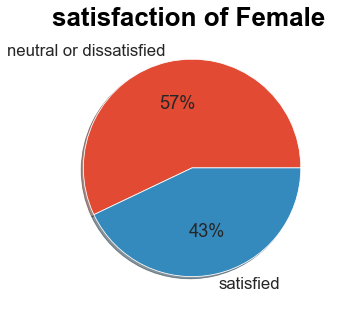

In [228]:
plt.figure(figsize=(12, 6));

df_g=df_train.loc[df.Gender=="Female",'satisfaction'].value_counts();
labels=df_g.index
fig,ax1=plt.subplots(1,1,figsize=(5,5));
ax1.pie(df_g,labels=labels, autopct='%1.0f%%',shadow=True);
plt.title("satisfaction of Female ",fontsize=26, weight = 'bold',color="black");
plt.show()

<Figure size 864x432 with 0 Axes>

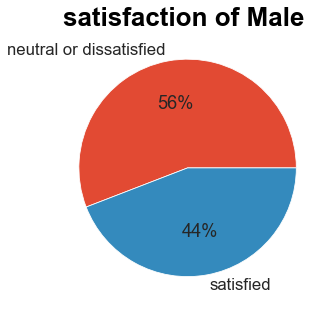

In [229]:
plt.figure(figsize=(12, 6));
#plt.subplot(1, 2, 1)

df_g=df_train.loc[df_train.Gender=="Male",'satisfaction'].value_counts();
labels=df_g.index
fig,ax1=plt.subplots(1,1,figsize=(5,5));
ax1.pie(df_g,labels=labels, autopct='%1.0f%%');
plt.title("satisfaction of Male ",fontsize=26, weight = 'bold',color="black");
plt.show();

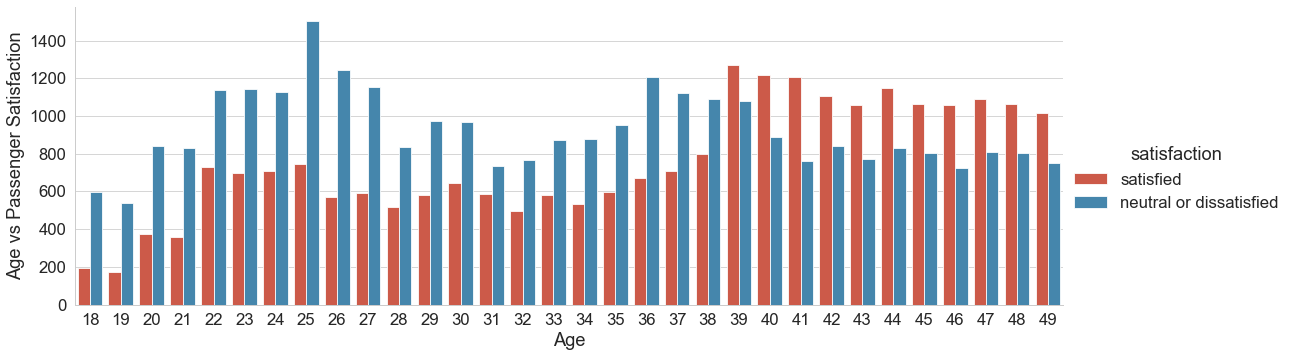

In [230]:

age = sns.catplot("Age", data=df_train, kind='count',aspect=3.0, hue='satisfaction', order=range(18,50))
age.set_ylabels('Age vs Passenger Satisfaction')

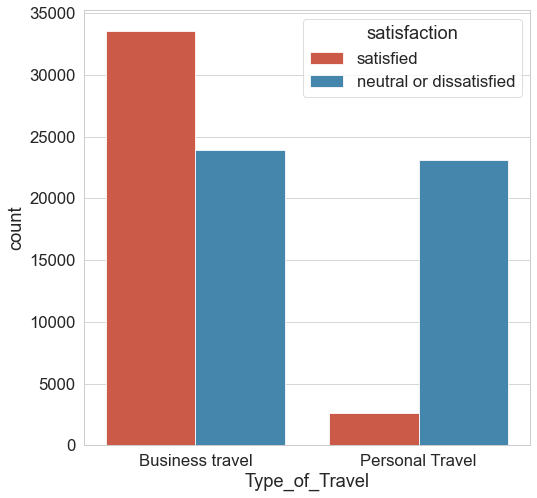

In [231]:
  
plt.subplots(figsize = (8,8))
sns.countplot(x ="Type_of_Travel", hue = "satisfaction", data =df_train)
    
plt.show()

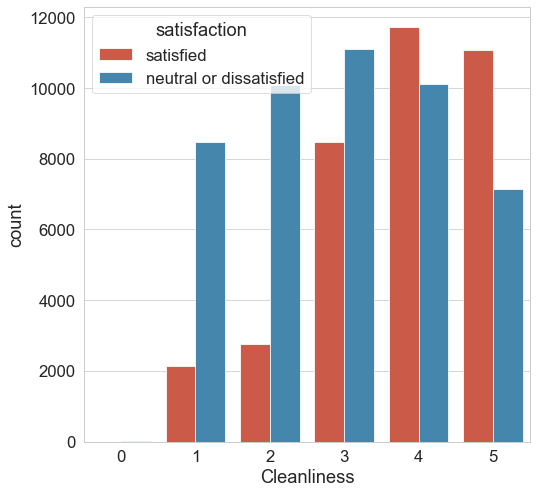

In [232]:
plt.subplots(figsize = (8,8))
sns.countplot(x ="Cleanliness", hue = "satisfaction", data =df_train)
plt.show()

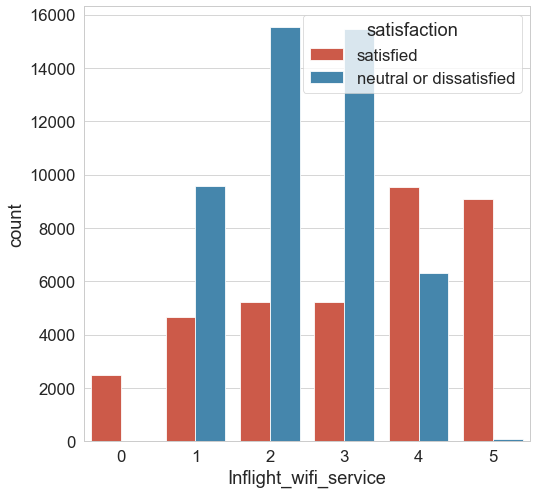

In [233]:
plt.subplots(figsize = (8,8))
sns.countplot(x ="Inflight_wifi_service", hue = "satisfaction", data =df_train)
plt.show()

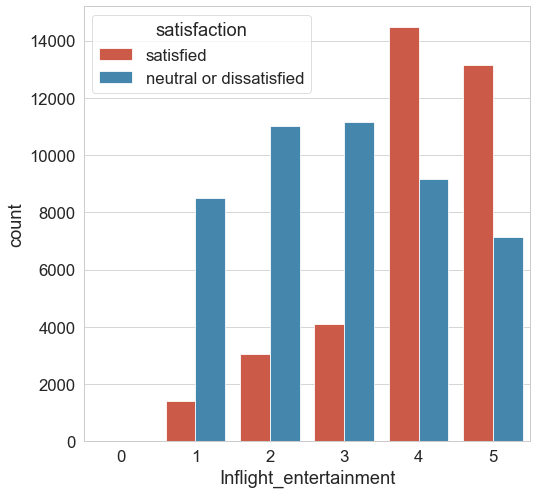

In [234]:
plt.subplots(figsize = (8,8))
sns.countplot(x ="Inflight_entertainment", hue = "satisfaction", data =df_train)
plt.show()

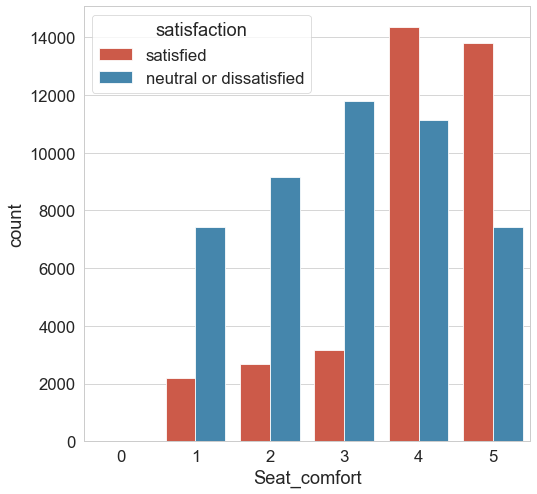

In [235]:
plt.subplots(figsize = (8,8))
sns.countplot(x ="Seat_comfort", hue = "satisfaction", data =df_train)
plt.show()

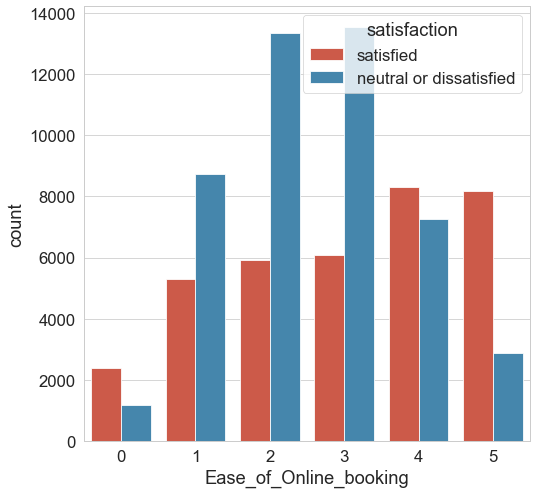

In [236]:
plt.subplots(figsize = (8,8))
sns.countplot(x ="Ease_of_Online_booking", hue = "satisfaction", data =df_train) 
plt.show()

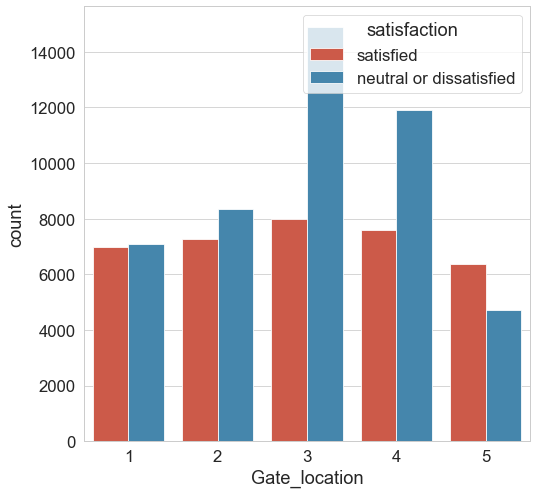

In [237]:
plt.subplots(figsize = (8,8))
sns.countplot(x ="Gate_location", hue = "satisfaction", data =df_train)
    
plt.show()

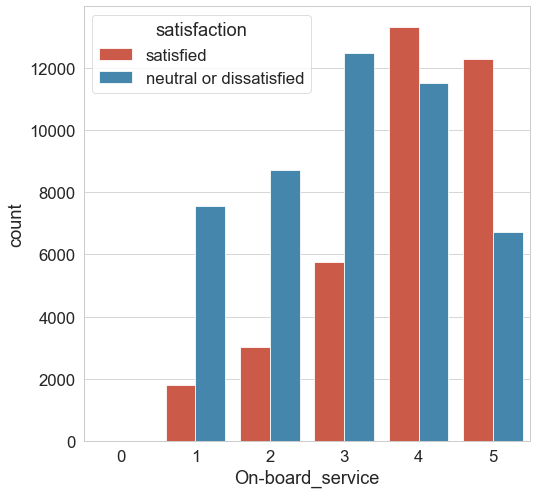

In [238]:
plt.subplots(figsize = (8,8))
sns.countplot(x ="On-board_service", hue = "satisfaction", data =df_train)
    
plt.show()

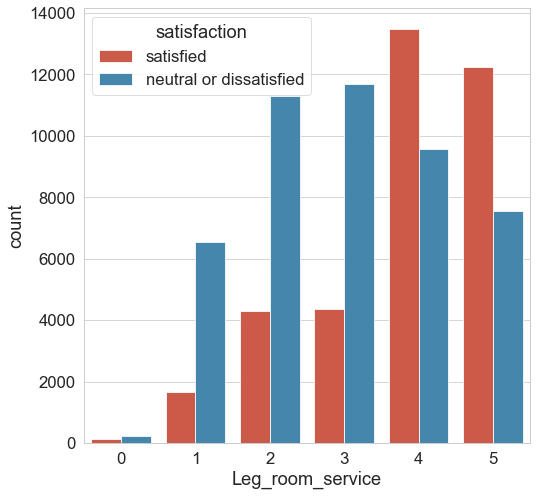

In [239]:
plt.subplots(figsize = (8,8))
sns.countplot(x ="Leg_room_service", hue = "satisfaction", data =df_train)
    
plt.show()

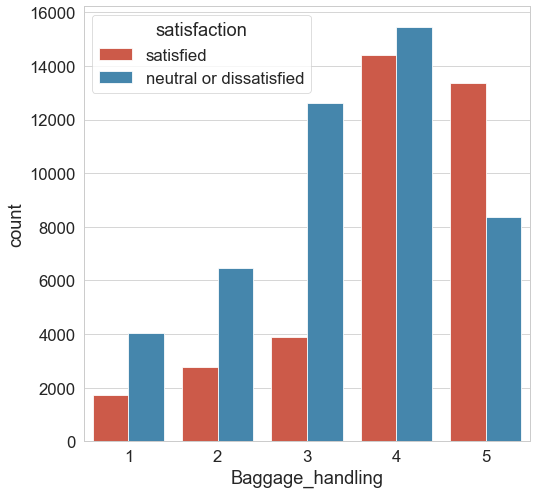

In [240]:
plt.subplots(figsize = (8,8))
sns.countplot(x ="Baggage_handling", hue = "satisfaction", data =df_train)
    
plt.show()

# Model


In [241]:
df_train.shape, df_test.shape 

((83123, 24), (20781, 24))

In [242]:
df_train = pd.get_dummies(df_train, drop_first =True, columns = ['Gender', 'Customer_Type', 
                                                         'Type_of_Travel', 'Class'])

In [243]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83123 entries, 99599 to 38693
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Age                                83123 non-null  int64  
 2   Flight_Distance                    83123 non-null  int64  
 3   Inflight_wifi_service              83123 non-null  int64  
 4   Departure/Arrival_time_convenient  83123 non-null  int64  
 5   Ease_of_Online_booking             83123 non-null  int64  
 6   Gate_location                      83123 non-null  int64  
 7   Food_and_drink                     83123 non-null  int64  
 8   Online_boarding                    83123 non-null  int64  
 9   Seat_comfort                       83123 non-null  int64  
 10  Inflight_entertainment             83123 non-null  int64  
 11  On-board_service                   83123 non-null 

In [244]:
df_train['satisfaction'] = df_train['satisfaction'].apply(lambda x: np.where(x=='satisfied', 1, 0))
#df_train.satisfaction.map({"satisfied":0, "neutral or dissatisfied":1})

In [245]:
x_train = df_train.drop('satisfaction', axis = 1)
y_train = df_train['satisfaction']

In [270]:
from sklearn.model_selection import cross_val_score

In [247]:
ml = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(ml, x_train, y_train, cv=5, scoring='accuracy')
print(scores)

[0.66610526 0.66694737 0.66881203 0.66157363 0.66716795]


In [248]:
print(scores.mean())

0.6661212480189888


In [249]:
from sklearn.model_selection import GridSearchCV

In [250]:
knn_gs=KNeighborsClassifier()

In [251]:
k_range = list(range(7, 10))

In [252]:
param_grid = dict(n_neighbors=k_range)

In [253]:
grid = GridSearchCV(knn_gs, param_grid, cv=5, scoring='accuracy')

In [254]:
grid.fit(x_train, y_train);

In [255]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 8}
Best estimator:  KNeighborsClassifier(n_neighbors=8)
Best score:  0.675577111450426


In [271]:
ml.predict(x_train) 

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [256]:
predict(x_train)

NameError: name 'predict' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix

print("kNN confusion matrix: \n\n", confusion_matrix(y_train,ml.predict(x_train)))

In [ ]:
lm1 = LogisticRegression(C=1000)
scores = cross_val_score(lml, x_train, y_train, cv=5, scoring='accuracy')
print(scores)